# Exercise 3 of Round 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#set some variables
N = 10 # number of observation set  
sigma = 0.8# we use the same standard deviation for all measurement
alpha = 100. 
beta = 100.
np.random.seed(2)
x = np.array([.3,.4]) # true variable
x_0 = np.array([0.25,0.25]) # initial guess    
iteration_end = 10 #number of iterations

R = sigma*sigma*np.eye(2) # measurement variance
R_inv = np.eye(2)/(sigma*sigma) 


# Measurement model and Jacobian

In [3]:
def g(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([alpha*np.sqrt(x1), beta*np.sqrt(x2)])


def G(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([[alpha/(2*np.sqrt(x1)), 0],
                     [0, beta/(2*np.sqrt(x2))]])

In [4]:
def J_cost(y,x):
    #This relies on the fact that our R is a block diagonal matrix, otherwise you need to use different notation
    E = sigma*np.eye(2)
    E_inv = (1/sigma)*np.eye(2)
    e = (y - g(x)) @ E_inv
    return np.sum(e**2)

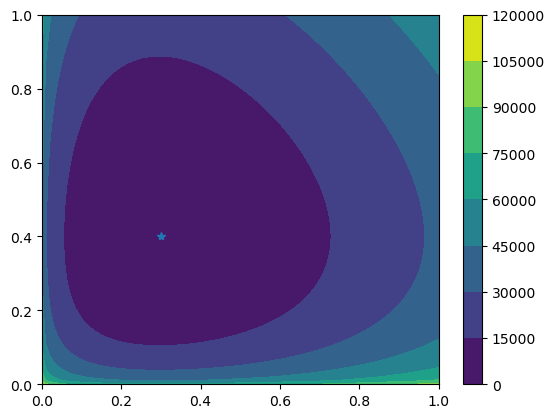

In [5]:
# simulate data
r = sigma*np.random.randn(N,2)
y = g(x) + r
Grid_size = 100
x1s = np.linspace(0,1, Grid_size) # creating linearly spaced values in the interval (0, 1)
x2s = np.linspace(0,1, Grid_size)
x_grid,y_grid = np.meshgrid(x1s,x2s) # creating rectangular grid
J = np.zeros((Grid_size,Grid_size))
for i in range(x_grid.shape[0]): 
    for j in range(x_grid.shape[1]):
        cx = np.array([x_grid[i,j],y_grid[i,j]])
        J[i,j] = J_cost(y,cx)

plt.contourf(x_grid,y_grid,J) # display three-dimensional data in two dimentions using color-coded regions
plt.colorbar()
plt.plot(x[0],x[1],'*');


$$
(\bar{\mathbf{G}}^\top \bar{\mathbf{R}}^{-1} \bar{\mathbf{G}}    )^{-1}\bar{\mathbf{G}}^\top \bar{\mathbf{R}}^{-1}(\mathbf{y} - \bar{\mathbf{g}}(\mathbf{x}))
= (\sum_i\mathbf{G}^\top \mathbf R^{-1} \mathbf G    )^{-1}\sum_i\mathbf{G}^\top \mathbf{R}^{-1}(\mathbf{y}_i - \mathbf{g}(\mathbf{x}))
$$
Which equals to
$$
(\mathbf{G}^\top \mathbf R^{-1} \mathbf{G})^{-1}\dfrac{1}{N}\sum_i\mathbf{G}^\top \mathbf{R}^{-1}(\mathbf{y}_i - \mathbf{g}_i(\mathbf{x}))
$$

# Gauss Newton method with line search

In [6]:
# Routine for Gauss Netwon with Line Search
x_GN_LS = np.zeros((iteration_end,2)) #the path of the estimation
x_GN_LS[0,:] = x_0
N_gamma_grid = 1000
gamma_max = 50
gamma = np.arange(1,N_gamma_grid+1)*gamma_max/N_gamma_grid
for j in range(iteration_end-1):
    x_now = x_GN_LS[j,:]
    gj = g(x_now)
    Gj = G(x_now)
    Delta_x = np.linalg.solve((Gj.T@R_inv@Gj),Gj.T@R_inv@np.sum(y-gj,axis=0)/N)
    J_min = J_cost(y,x_now)
    gamma_min = 0
    for k in range(N_gamma_grid):
        J_prop = J_cost(y,x_now+gamma[k]*Delta_x)
        if J_prop < J_min:
            J_min = J_prop
            gamma_min = gamma[k]
    print('Gamma_min = {0:.3f}'.format(gamma_min))
    x_GN_LS[j+1,:] = x_now + gamma_min * Delta_x

Gamma_min = 1.100
Gamma_min = 1.000
Gamma_min = 1.000
Gamma_min = 0.850
Gamma_min = 0.000
Gamma_min = 0.000
Gamma_min = 0.000
Gamma_min = 0.000
Gamma_min = 0.000


In [7]:
x_GN_LS

array([[0.25      , 0.25      ],
       [0.29850277, 0.39600918],
       [0.29603255, 0.40034251],
       [0.29603766, 0.40035437],
       [0.29603766, 0.40035437],
       [0.29603766, 0.40035437],
       [0.29603766, 0.40035437],
       [0.29603766, 0.40035437],
       [0.29603766, 0.40035437],
       [0.29603766, 0.40035437]])

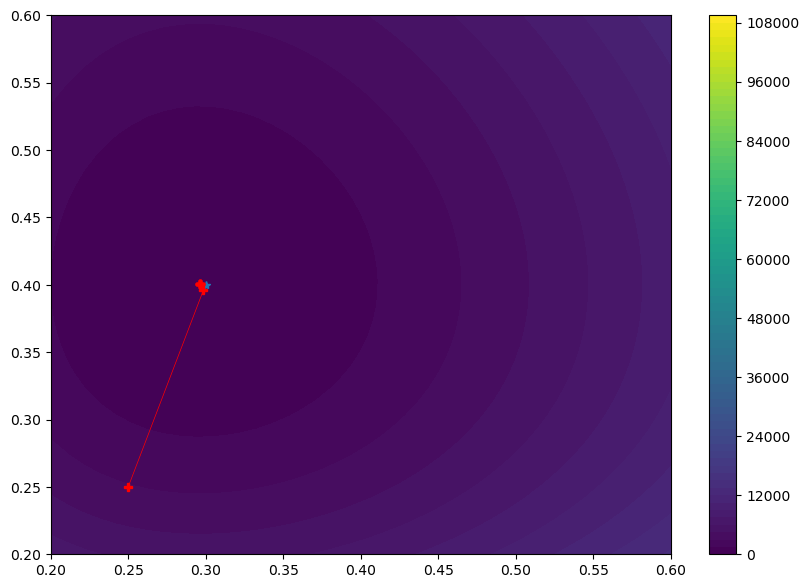

In [8]:
plt.figure(figsize=(10,7))
plt.contourf(x_grid,y_grid,J, 100)
plt.colorbar()
plt.plot(x[0],x[1],'*')
plt.plot(x_GN_LS[:,0],x_GN_LS[:,1],c='r',marker="P",linewidth=0.5);
plt.xlim(0.2,0.6)
plt.ylim(0.2,0.6);

# Levenberg Marquardt method

In [9]:
x_LM = np.zeros((iteration_end,2)) #the path of the estimation
x_LM[0,:] = x_0
I = np.eye(2)
lambda_LM = 0.01 # set this 0 and infinity (e.g. 1e10) to see the results.
nu = 10
for j in range(iteration_end-1):
    x_now = x_LM[j,:]
    gj = g(x_now)
    Gj = G(x_now)
    dx = np.linalg.solve((N*Gj.T@R_inv@Gj + lambda_LM*I),Gj.T@R_inv@np.sum(y-gj,axis=0))    
    if J_cost(y, x_now + dx) < J_cost(y, x_now):
        x_LM[j+1,:] = x_now + dx
        lambda_LM = lambda_LM / nu
    else:
        x_LM[j+1,:] = x_now
        lambda_LM = lambda_LM * nu

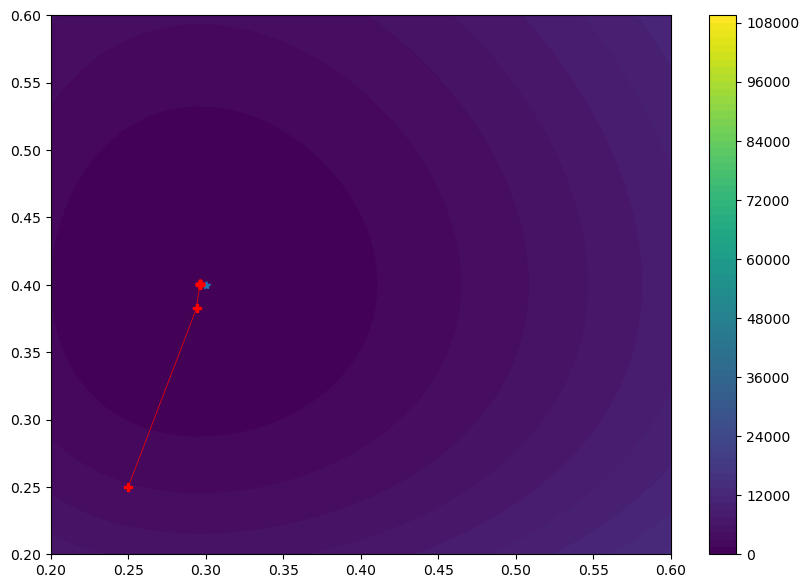

In [10]:
plt.figure(figsize=(10,7))
plt.contourf(x_grid,y_grid,J, 100)
plt.colorbar()
plt.plot(x[0],x[1],'*')
plt.plot(x_LM[:,0],x_LM[:,1],c='r',marker="P",linewidth=0.5)
plt.xlim(0.2,0.6)
plt.ylim(0.2,0.6);

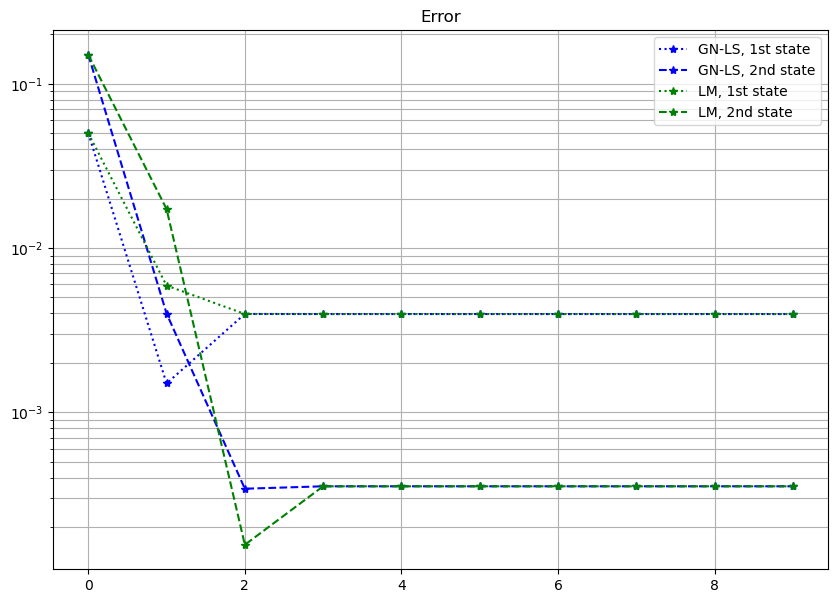

In [11]:
plt.figure(figsize=(10,7))
plt.semilogy(np.abs(x_GN_LS[:,0]-x[0]),'b*:',label='GN-LS, 1st state')
plt.semilogy(np.abs(x_GN_LS[:,1]-x[1]),'b*--',label='GN-LS, 2nd state')
plt.semilogy(np.abs(x_LM[:,0]-x[0]),'g*:',label='LM, 1st state')
plt.semilogy(np.abs(x_LM[:,1]-x[1]),'g*--',label='LM, 2nd state')
plt.grid(True, which="both")
plt.legend();
plt.title('Error');